In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

with open("copper-new.txt") as f:
    lines = [line.lstrip().rstrip().split('  ') for line in f]
array_lines = np.array(lines)

data = pd.DataFrame(lines)

data.columns = ['y', 'x']         
new_x = np.array([float(i) for i in data['x'].values]).reshape(-1,1)    # x: temperature
new_y = np.array([float(i) for i in data['y'].values]).reshape(-1,1)   # y: coefficient
plt.xlabel("Temperature")      
plt.ylabel("Coefficient")
plt.scatter(new_x, new_y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
data.head(2)

,y,x
0,0.5910,24.4100
1,4.7030,54.9800


In [3]:
# Linear Regression
# Get the train and test data split
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

lm = LinearRegression().fit(x_train, y_train)
score = lm.score(x_train, y_train)
#print('Score =', score)
print('Coef =', lm.coef_)
print('Intercept =', lm.intercept_)

y_pred = lm.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE is {0:.3f}'.format(mse))

(47, 1) (12, 1) (47, 1) (12, 1)
Coef = [[0.02209217]]
Intercept = [6.82866852]
MSE is 5.011


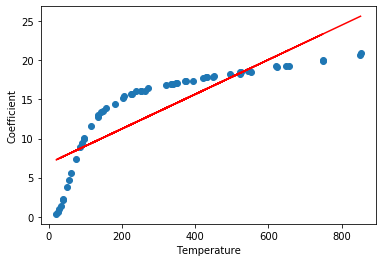

In [4]:
# Plot linear regression 
plt.xlabel("Temperature")
plt.ylabel("Coefficient")
plt.scatter(new_x, new_y)
plt.plot(new_x, lm.predict(new_x), color='r')

MSE is:  [1.39304784e+01 5.01054782e+00 4.87842715e+00 1.49973354e+00
 3.76010070e-01 7.27316547e-02 6.43661749e-02 5.91783311e-02
 3.94255783e-02 2.37050128e-02 8.48593885e-03 1.40671989e-02]
Best degree is:  10
MSE of degree(10) is: is 0.008


C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.31068e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42099e-24): result may not be accurate.
  overwrite_a=True).T
C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11235e-30): result may not be accurate.
  overwrite_a=True).T
C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.07884e-36): result may not be accurate.
  overwrite_a=True).T
C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.42322e-42): result may not be accurate.
  overwrite_a=True).T
C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\r

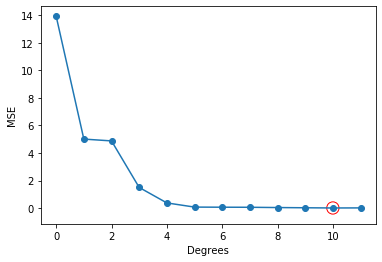

In [31]:
# Q2(2) Optimization with different degree
t1_error = np.empty(12)
for degree in range(12):
    est = make_pipeline(PolynomialFeatures(degree),  Ridge())
    est.fit(x_train, y_train)
    t1_error[degree] = mean_squared_error(y_test, est.predict(x_test))
print("MSE is: ", t1_error)
mse1 = t1_error[np.argmin(t1_error)] 
print('Best degree is: ', np.argmin(t1_error))
print('MSE of degree(10) is: is {0:.3f}'.format(mse1))

# Plot
plt.plot(range(12), t1_error, '-o')
plt.scatter(np.argmin(t1_error), t1_error[np.argmin(t1_error)], 150, color='none', edgecolors='red')
plt.xlabel("Degrees")
plt.ylabel("MSE")
plt.show()

C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.65842e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04871e-30): result may not be accurate.
  overwrite_a=True).T
C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22621e-59): result may not be accurate.
  overwrite_a=True).T


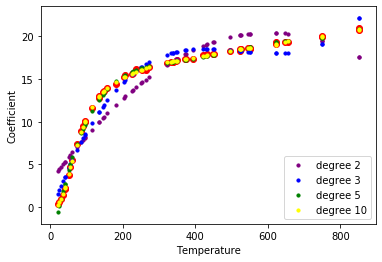

In [55]:
# Plot 
plt.xlabel("Temperature")
plt.ylabel("Coefficient")
plt.scatter(new_x, new_y, color='red')

colors = ['purple','blue', 'green', 'yellow']

for count, degree in enumerate([2,3,5,10]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(new_x, new_y)
    y_plot = model.predict(new_x)    
    plt.scatter(new_x, y_plot, color=colors[count], s=10, label="degree %d" % degree)
plt.legend(loc='lower right')
plt.show()

Split of train and test = 47 : 12
Split of train and test = 47 : 12
Split of train and test = 47 : 12
Split of train and test = 47 : 12
Split of train and test = 47 : 12
MSE is:  [0.02319159 0.02270547 0.02248625 0.02293146 0.02303855 0.02267693
 0.02280944 0.02303572 0.02282485 0.02365687 0.0282252  0.03806449
 0.04102378 0.04075853 0.03652265 0.08699431 0.29602072 0.35331076
 0.36332727 0.44267993]
No. of minimal MSE is:  2
Best alpha is:  1.274274985703132e-08
MSE of Best alpha is 0.022


C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2434e-69): result may not be accurate.
  overwrite_a=True).T
C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4036e-68): result may not be accurate.
  overwrite_a=True).T
C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.58444e-67): result may not be accurate.
  overwrite_a=True).T
C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78857e-66): result may not be accurate.
  overwrite_a=True).T
C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.01901e-65): result may not be accurate.
  overwrite_a=True).T
C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\rid

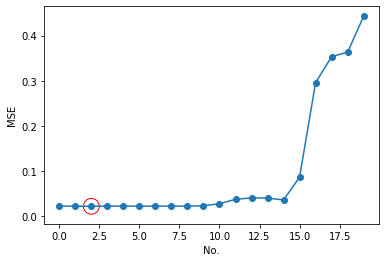

In [64]:
# Optimization with different alpha
#Samples are first shuffled and then split into a pair of train and test sets.
from sklearn.model_selection import KFold
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for xx, yy in ss.split(data):
    print('Split of train and test =', len(xx),":",len(yy))

xx_train = new_x[xx]
xx_test = new_x[yy]
yy_train = new_y[xx]
yy_test = new_y[yy]

t2_error = np.zeros(20)
degree = 10
alphas = np.logspace(-10, 10, 20)
for i in range(len(alphas)):
    est = make_pipeline(PolynomialFeatures(degree), Ridge(alphas[i]))   # normalize=True
    est.fit(xx_train, yy_train)
    t2_error[i] = mean_squared_error(yy_test, est.predict(xx_test))
print("MSE is: ", t2_error)

mse2 = t2_error[np.argmin(t2_error)] 
a = alphas[np.argmin(t2_error)]
print('No. of minimal MSE is: ', np.argmin(t2_error))
print('Best alpha is: ', a)
print('MSE of Best alpha is {0:.3f}'.format(mse2))

# Plot
plt.plot(range(20), t2_error, '-o')
plt.scatter(np.argmin(t2_error), t2_error[np.argmin(t2_error)], 250, color='none', edgecolors='red')
plt.xlabel("No.")
plt.ylabel("MSE")
plt.show()

In [34]:
# (4) Prediction of coefficient with 400 degree Kelvin using above model
# (a). Prediction with Linear model model
print("Prediciton with linear model is: ", lm.predict([[400]]))

Prediciton with linear model is:  [[15.6655352]]


In [63]:
#(b). Prediction with Polynomial with best degreee and ridge()     
est = make_pipeline(PolynomialFeatures(degree=10),  Ridge())
est.fit(x_train, y_train)
est.predict([[400]])

C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24404e-59): result may not be accurate.
  overwrite_a=True).T


array([[17.49274293]])

In [53]:
# For best mse after optimization
poly_ridge = make_pipeline(PolynomialFeatures(10), Ridge(alpha=a))
poly_ridge.fit(xx_train, yy_train)
poly_ridge.predict([[400]])

C:\Users\wuguo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.58444e-67): result may not be accurate.
  overwrite_a=True).T


array([[17.51828854]])